In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [19]:
h = [56, 40, 23, 70, 22]
d = [3.3, 2.75, 2.2, 3.8, 2]

In [20]:
def forward_model(m,g):
    return np.sqrt(2*m/g)

In [21]:
# data_prior
# Assume gaussian distribution around observed point
def rho_d(d_pred,d_obs, d_sigma=0.1):
    return stats.norm.pdf(d_obs, loc=d_pred, scale=d_sigma)

In [22]:
def log_likelihood(h, g, d_obs):
    d_pred = forward_model(h, g)
    log_likelihood = rho_d(d_pred, d_obs, d_sigma=0.1)
    return np.sum(log_likelihood)

In [23]:
def model_prior(g):
    if g < 7 or g > 9.9:
        return 0
    else:
        return g
     

In [ ]:
def posterior(h, g, d_obs):
    return log_likelihood(h, g, d_obs) * model_prior(g)

In [25]:
g_vals = np.linspace(5, 15, 100)
posterior_vals = [posterior(h, g, d) for g in g_vals]

plt.plot(g_vals, posterior_vals)
plt.vlines(x=7, color='r', linestyle='--', label='model prior limits')
plt.vlines(x=9.9, color='r', linestyle='--')
plt.legend()

ValueError: operands could not be broadcast together with shapes (5,) (10,) 

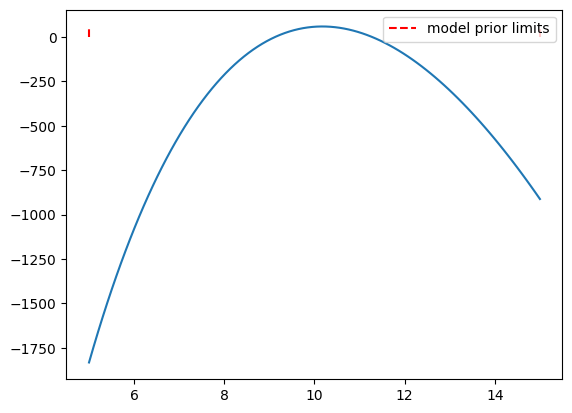

In [30]:
h = np.array([56, 40, 23, 70, 22], float)
d = np.array([3.3, 2.75, 2.2, 3.8, 2], float)

def forward_model(m, g):
    return np.sqrt(2*np.asarray(m)/g)

def rho_d(d_pred, d_obs, d_sigma=0.1):
    return stats.norm.pdf(d_obs, loc=d_pred, scale=d_sigma)

def log_likelihood(h, g, d_obs):
    d_pred = forward_model(h, g)
    return np.sum(np.log(rho_d(d_pred, d_obs, d_sigma=0.1)))

def model_prior(g):
    return g if (5 <= g <= 15) else 0

def posterior(h, g, d_obs):
    return log_likelihood(h, g, d_obs) * model_prior(g)

g_vals = np.linspace(5, 15, 100)
posterior_vals = [posterior(h, g, d) for g in g_vals]
plt.plot(g_vals, posterior_vals)
plt.vlines(x=5, ymin=0, ymax=max(posterior_vals), color='r', linestyle='--', label='model prior limits')
plt.vlines(x=15, ymin=0, ymax=max(posterior_vals), color='r', linestyle='--')
plt.legend()